# O Passeio Aleatório 1D: Comparação entre Simulação e Teoria

Um Passeio Aleatório 1D descreve o movimento de uma partícula que se desloca em uma linha reta, dando um passo para a direita (+1) ou para a esquerda (-1) a cada instante de tempo. Cada passo é independente do anterior e tem uma probabilidade igual de ocorrer (geralmente 0.5 para cada direção em um passeio simétrico).

A Distribuição Binomial é uma distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência de $n$ ensaios independentes de Bernoulli, cada um com uma probabilidade $p$ de sucesso. No contexto do passeio aleatório 1D, podemos fazer uma conexão direta:

* Ensaios: Cada passo do passeio (`n_steps`) pode ser considerado um ensaio.
* Sucesso: Um "sucesso" pode ser definido como dar um passo para a direita (+1). A probabilidade de "sucesso" ($p$) é 0.5 para um passeio simétrico.
* Fracasso: Um "fracasso" seria dar um passo para a esquerda (-1), com probabilidade $1-p = 0.5$.

Se considerarmos que um passeio de $n$ passos tem $k$ passos para a direita e, consequentemente, $n-k$ passos para a esquerda, a posição final $X$ será dada por $X = k - (n-k) = 2k - n$.

A probabilidade de ter exatamente $k$ passos para a direita em $n$ passos é dada pela Função Massa de Probabilidade (PMF) da distribuição binomial:

$$P(K=k) = C(n, k) \cdot p^k \cdot (1-p)^{n-k}$$

Onde:
* $C(n, k)$ é o coeficiente binomial ("n escolhe k"), que representa o número de maneiras de obter $k$ sucessos em $n$ ensaios.
* $p$ é a probabilidade de um passo para a direita (0.5 no nosso caso).
* $k$ é o número de passos para a direita.


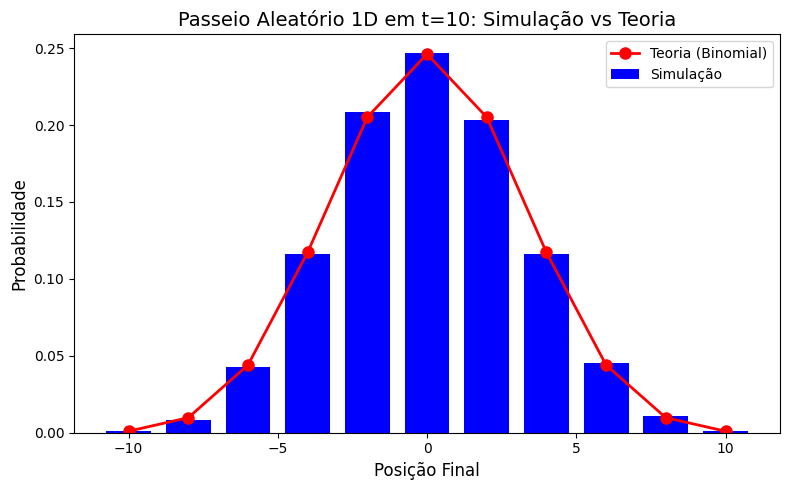

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros da simulação
n_simulations = 10**4   # Número de simulações
n_steps = 10            # Número de passos (tempo t=10)

# Simulação do passeio aleatório 1D
def random_walk_1d(n_steps):
    """Simula um passeio aleatório 1D com n_steps passos."""
    steps = np.random.choice([-1, 1], size=n_steps)
    return np.sum(steps)

# Executar múltiplas simulações
final_positions = np.array([random_walk_1d(n_steps) for _ in range(n_simulations)])

# Calcular as posições possíveis (sempre pares porque n_steps é par)
possible_positions = np.arange(-n_steps, n_steps + 1, 2)

# Calcular frequências observadas
observed_counts = np.array([np.sum(final_positions == pos) for pos in possible_positions])
observed_probs = observed_counts / n_simulations

# Calcular a distribuição teórica binomial
n = n_steps
k_values = (possible_positions + n) // 2  # Converter posição para número de passos à direita
theoretical_probs = binom.pmf(k_values, n, 0.5)

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.bar(possible_positions, observed_probs, width=1.5, color='blue',label='Simulação')
plt.plot(possible_positions, theoretical_probs, 'ro-', linewidth=2, markersize=8, label='Teoria (Binomial)')

# Configurações do gráfico
plt.title('Passeio Aleatório 1D em t=10: Simulação vs Teoria', fontsize=14)
plt.xlabel('Posição Final', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.legend()
plt.tight_layout()
